In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns

In [ ]:
# Đọc dữ liệu vào dataframe
df = pd.read_csv("matches.csv")
df

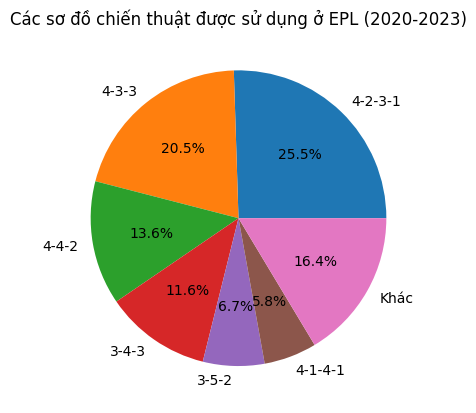

In [18]:

# Đếm số lượng dòng tương ứng với số trận
total = df.shape[0]

# Đếm số lượng mẫu cho từng giá trị của cột "formation"
counts = df["formation"].value_counts()

# Gom các phần có số lần xuất hiện bé hơn 3%
others = counts[counts/total <0.03].sum()
counts = counts[counts/total >=0.03]
counts['Khác'] = others


# Vẽ pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Thêm tiêu đề cho biểu đồ
plt.title("Các sơ đồ chiến thuật được sử dụng ở EPL (2020-2023)")

# Hiển thị biểu đồ
plt.show()

<h3> Trường dữ liệu </h3>
<ul>
    <li>formation</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Tính phần trăm của mỗi giá trị formation so với tổng số trận đấu</li>
</ul>

<h3> Phân tích, khám phá </h3>
 - Biểu đồ thể hiện tỉ lệ phần trăm các sơ đồ chiến thuật được sử dụng ở giải bóng đá Ngoại hạng Anh từ năm 2020 - 2023. Qua biểu đồ ta thấy được sơ đồ 4-2-3-1 được sử dụng nhiều nhất với 25.5%, ngay sau đó 4-4-3 (20.5%), 4-4-2 (13.6%) và 3-4-3 (11.6%). 4 sơ đồ này chiến tổng cộng đến hơn 70% điều này cho thấy rằng đây là 4 đội hình phổ biến nhất hiện tại và được đa số các đội ở Ngoại hạng Anh sử dụng. Các sơ đồ chiến thuật còn lại được sử dụng khá ít, có thể lý do là độ hiệu quả của các sơ đồ này trong môi trường Ngoại hạng Anh là không cao.
<h3> Lý do chọn biểu đồ tròn </h3>
<ul>
  <li>Biểu đồ tròn là một công cụ hữu ích để thể hiện tỷ lệ phần trăm của một loạt các mục khác nhau trong một trường dữ liệu. </li>
  <li>Cho thấy tỉ lệ phần trăm các sơ đồ chiến thuật sử dụng trong giải đấu</li>
  <li>Giúp cho người đọc có thể dễ dàng so sánh tỷ lệ phần trăm của các sơ đồ khác nhau </li>
  <li>Giúp cho các thông tin trở nên trực quan và dễ hiểu hơn so với việc đọc các con số trong một bảng dữ liệu</li>
</ul>



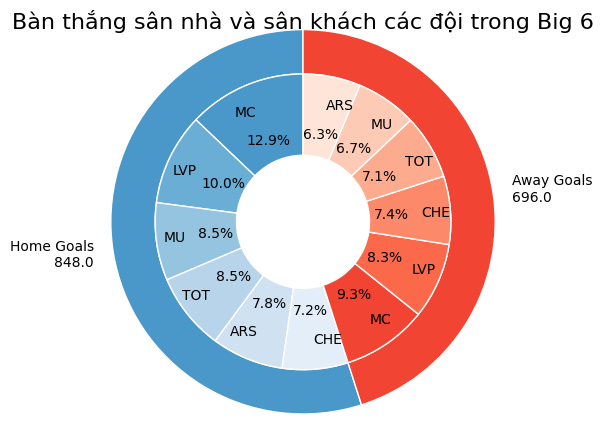

In [63]:
# lấy các cột venue, gf, team
subset_df = df.loc[:, ['venue', 'gf', 'team']]

#Lọc dữ liệu các team trong Big6
teams= ['Manchester City','Manchester United','Arsenal','Tottenham Hotspur','Chelsea','Liverpool'] #Các đội trong Big6
shortTeamNames = {'Manchester City':'MC','Manchester United':'MU','Arsenal':'ARS','Tottenham Hotspur':'TOT','Chelsea':'CHE','Liverpool':'LVP'} #Tên viết tắt các đội
df_filtered = subset_df.loc[subset_df['team'].isin(teams)]



# Đếm số bàn sân nhà sân khách các đội
df_grouped = df_filtered.groupby(['venue', 'team']).sum().reset_index()

# Chia ra sân nhà và sân khách sau đó sort theo số lượng bàn
df_home = df_grouped[df_grouped['venue'] == 'Home'].sort_values(by='gf', ascending=False)
df_away = df_grouped[df_grouped['venue'] == 'Away'].sort_values(by='gf', ascending=False)


# Tính tổng số bàn thắng sân nhà và sân khách
total_home_goals = df_home['gf'].sum()
total_away_goals = df_away['gf'].sum()


# Tạo nested pie chart
fig, ax = plt.subplots()

#Tạo colors
homeColor,awayColor = [plt.cm.Blues, plt.cm.Reds]
# Vẽ pie chart ngoài cùng (tổng số bàn thắng)
outer_labels = ['Home Goals\n{}'.format(total_home_goals),
                'Away Goals\n{}'.format(total_away_goals)]
outer_values = [total_home_goals, total_away_goals]
mypie,_=ax.pie(outer_values, radius=1.3, labels=outer_labels, colors=[homeColor(0.6), awayColor(0.6)],startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')



# Vẽ pie chart bên trong (số bàn thắng sân nhà và sân khách của từng đội)
inner_values = df_home['gf'].tolist() + df_away['gf'].tolist()
inner_labels = df_home['team'].tolist() + df_away['team'].tolist()
inner_labels = list(map(lambda x: shortTeamNames[x] if x in shortTeamNames else x, inner_labels)) #Đổi tên các đội thành tên viết tắt

mypie2 = ax.pie(inner_values, radius=1.3-0.3,  labeldistance=0.8, autopct='%1.1f%%',
labels=inner_labels,  colors=[homeColor(0.6),homeColor(0.5),homeColor(0.4),homeColor(0.3),homeColor(0.2),homeColor(0.1),awayColor(0.6),awayColor(0.5),awayColor(0.4),awayColor(0.3),awayColor(0.2),awayColor(0.1)],startangle=90)
plt.setp( mypie2[0], width=0.55, edgecolor='white')

# Thêm tiêu đề
ax.set_title('Bàn thắng sân nhà và sân khách các đội trong Big 6', fontsize=16)

# Hiển thị biểu đồ
plt.show()

<h3> Trường dữ liệu </h3>
<ul>
    <li>vue</li>
    <li>gf</li>
    </li>team</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Lọc ra các cột vue,gf,team từ dữ liệu</li>
    <li>Tiếp thục lọc theo các team thuộc nhóm big6 </li>
    <li>Đếm tổng số bàn sân nhà, sân khách </li>
    <li>Đếm số bàn sân nhà và sân khách từng đội</li>
    <li>Tính phần trăm bàn thắng sân nhà, sân khách </li>
    <li>Tính phần trăm bàn thăng sân nhà/sân khách của mỗi đội </li>
</ul>

<h3> Phân tích, khám phá </h3>
 - Biểu đồ này là một nested pie chart thể hiện số lượng bàn thắng được ghi được của các đội bóng trong Big 6 của Ngoại hạng Anh trên sân nhà và sân khách. Pie chart ngoài cùng thể hiện tổng số bàn thắng của cả sân nhà và sân khách của tất cả các đội. Pie chart bên trong thể hiện phân bố bàn thắng giữa sân nhà và sân khách của từng đội bóng. 
 - Từ biểu đồ ta có thể thấy tổng số bàn thắng trên sân nhà là cao hơn so với sân khách, điều này chứng tỏ sân nhà mang lại lợi thế lớn hơn nhiều cho các đội bóng. 
 - Manchester City là đội có số bàn thằng cao nhất ở cả sân nhà và sân khách, Liverpool cũng thứ 2 về thành tích ghi bản cả sân nhà và sân khách cho thấy 2 đội này có hàng công mạnh ghi bàn ổn định ở cả sân nhà và sân khách. Manchester United và Tottenham là đội có tổng số bàn thằng nằm giữa và số bàn sân khách ít hơn so với sân nhà. Chelsea là trường hợp đặc biệt khi số bàn thằng sân khách của họ lại nhiều hơn sân nhà. Arsenal có số bàn thắng khá thấp ở cả sân nhà và sân khách so với các đội khác chứng tỏ họ đang gặp vấn đề về đầu ra bàn thằng trong những năm gần đây.

<h3> Lý do chọn nested pie chart( biểu đồ tròn lồng nhau) </h3>
<ul>
  <li>Nested pie chart thường được dùng để phân cấp dữ liệu. Trong trường hợp này, số lượng bàn thắng sân nhà và sân khách của từng đội trong Big 6 có thể được xem như là phân cấp của tổng số bàn thắng của từng đội đó. Nested pie chart cho phép ta trực quan hóa được phân cấp này bằng cách đặt biểu đồ tròn bên trong biểu đồ tròn lớn hơn để biểu thị số lượng bàn thắng sân nhà và sân khách của từng đội. </li>
  <li>Dễ dàng nhìn thấy sự phân chia tỉ lệ bàn thắng các đội</li>
  <li>Biểu đồ nested pie chart này giúp người xem có thể dễ dàng so sánh số lượng bàn thắng sân nhà và sân khách của từng đội với tổng số bàn thắng và so sánh số bàn thắng các đội với nhau</li>
</ul>